In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'/home/jungbluth/Desktop'

In [3]:
T = 300 # [K]
h = 6.626 * 10**(-34) # [kgm^2/s]
h_2 = 4.14*10**(-15) # eV s
c = 3 * 10**(8) # [m/s]
k = 1.38 * 10**(-23) # [kgm^2/s^2K]
k_2 = 8.6*10**(-5) # eV / K
q = 1.60217662 * 10**(-19) # [C]

In [4]:
def bb(E):  
    phi_bb_df=pd.DataFrame()
    energy = []
    phi = []
    for e in E:
        phi_bb = ((2*math.pi * e**2)/(h_2**3 * c**2))/(math.exp(e/(k_2*T))-1) 
        energy.append(e)
        phi.append(phi_bb)
    phi_bb_df['Energy'] = energy
    phi_bb_df['Phi'] = phi
    return phi_bb_df #[s/kg m^4]

In [5]:
def J0_rad(E, EQE, phi_bb):
    J0_rad_list = []
    for n in range(1,len(E)):
        j0 = q*EQE[n]*phi_bb[n]*(E[n-1]-E[n])
        J0_rad_list.append(j0) # [A / m^2]
        J0_rad = np.sum(J0_rad_list)/10 # [mA / cm^2]
    return J0_rad 

In [6]:
def Voc_rad(Voc, Jsc, J0_rad):
    Voc_rad = k*T/q * math.log((Jsc/J0_rad)+1)
    Voc_nonrad = Voc_rad - Voc
    return Voc_rad, Voc_nonrad

In [7]:
def LED_QE(Voc_nonrad):
    LED_QE = math.exp(-(Voc_nonrad*q)/(k*T))
    return LED_QE

In [8]:
ZnPc_5 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR46_D_5_ZnPc_C60_2')
ZnPc_25 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR45_D_25_ZnPc_C60_5')
ZnPc_50 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR39_C_50_ZnPc_C60_4')
ZnPc_75 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR45_A_75_ZnPc_C60_4')

In [9]:
F4ZnPc_5 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR40_B_5_F4ZnPc_C60_8')
F4ZnPc_25 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR41_B_25_F4ZnPc_C60_2')
F4ZnPc_50 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR40_A_50_F4ZnPc_C60_4')
F4ZnPc_75 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR41_C_75_F4ZnPc_C60_4')

In [10]:
#F8ZnPc_5 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR42_D_5_F8ZnPc_C60_1')
F8ZnPc_5 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR52_C_5_F8ZnPc_C60_2')
F8ZnPc_25 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR43_D_25_F8ZnPc_C60_5')
F8ZnPc_50 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR42_C_50_F8ZnPc_C60_7')
F8ZnPc_75 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR43_A_75_F8ZnPc_C60_4')
F8ZnPc_95 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR52_A_95_F8ZnPc_C60_8')

In [11]:
F16ZnPc_5 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR50_A_5_F16ZnPc_C60_5')
F16ZnPc_25 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR44_D_25_F16ZnPc_C60_1')
F16ZnPc_50 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR50_D_50_F16ZnPc_C60_7')
F16ZnPc_75 = pd.read_csv('ZnPc_Data/ZnPc_series_sEQE_analysis/DR44_C_75_F16ZnPc_C60_1')

In [12]:
samples = [ZnPc_5, ZnPc_25, ZnPc_50, ZnPc_75, F4ZnPc_5, F4ZnPc_25, F4ZnPc_50, F4ZnPc_75, F8ZnPc_5, F8ZnPc_25, F8ZnPc_50, F8ZnPc_75, F8ZnPc_95, F16ZnPc_25, F16ZnPc_75, F16ZnPc_50, F16ZnPc_5]
columns = ['DR46_D_5_ZnPc_C60_2', 'DR45_D_25_ZnPc_C60_5', 'DR39_C_50_ZnPc_C60_4', 'DR45_A_75_ZnPc_C60_4', 'DR40_B_5_F4ZnPc_C60_8', 'DR41_B_25_F4ZnPc_C60_2', 'DR40_A_50_F4ZnPc_C60_4', 'DR41_C_75_F4ZnPc_C60_4', 'DR42_D_5_F8ZnPc_C60_1', 'DR43_D_25_F8ZnPc_C60_5', 'DR42_C_50_F8ZnPc_C60_7', 'DR43_A_75_F8ZnPc_C60_4', 'DR52_A_95_F8ZnPc_C60_8', 'DR44_D_25_F16ZnPc_C60_1', 'DR44_C_75_F16ZnPc_C60_1', 'DR50_D_50_F16ZnPc_C60_7', 'DR50_A_5_F16ZnPc_C60_5']
Voc = [0.76, 0.54, 0.48, 0.50, 0.88, 0.76, 0.74, 0.74, 0.82, 1.10, 0.98, 0.90, 0.64, 0.86, 0.56, 0.78, 1.18]
Jsc = [3.74, 6.85, 6.07, 4.95, 3.36, 6.45, 7.05, 4.54, 1.20, 0.40, 0.16, 0.08, 0.22, 0.51, 0.31, 0.62, 0.77]
Ect = [1.37, 1.23, 1.20, 1.19, 1.57, 1.42, 1.47, 1.49, 1.63, 1.63, 1.63, 1.60, 0.00, 1.48, 1.49, 1.47, 0.00]

In [20]:
summary = pd.DataFrame()
j0_list = []
voc_rad_list = []
delta_voc_nonrad_list = []
led_QE_list = []
delta_voc_rad_list = []

for n in range(len(samples)):
    df = samples[n]
    E = df['Energy']
    bb_df = bb(E)
    j0_rad = J0_rad(E, df['EQE'], bb_df['Phi'])
    voc_rad, voc_nonrad = Voc_rad(Voc[n], Jsc[n], j0_rad)
    led_QE = LED_QE(voc_nonrad)
    
    j0_list.append(j0_rad)
    voc_rad_list.append(voc_rad)
    delta_voc_nonrad_list.append(voc_nonrad)
    led_QE_list.append(led_QE)
    delta_voc_rad_list.append(Ect[n]-voc_nonrad-Voc[n])
    
    
summary['Sample']=columns
summary['Jsc [mA/cm2]']=Jsc
summary['J0,rad [mA/cm2]']=j0_list
summary['Voc,rad [V]']=voc_rad_list
summary['Delta Voc, nonrad [V]']=delta_voc_nonrad_list
summary['Delta Voc, rad [V]']=delta_voc_rad_list
summary['ECT [V]']=Ect
summary['Voc [V]']=Voc
summary['LED QE']=led_QE_list

In [21]:
summary

,Sample,Jsc [mA/cm2],"J0,rad [mA/cm2]","Voc,rad [V]","Delta Voc, nonrad [V]","Delta Voc, rad [V]",ECT [V],Voc [V],LED QE
0,DR46_D_5_ZnPc_C60_2,3.74,2.216771e-19,1.143986,0.383986,0.226014,1.37,0.76,3.517965e-07
1,DR45_D_25_ZnPc_C60_5,6.85,1.041184e-16,1.000655,0.460655,0.229345,1.23,0.54,1.810105e-08
2,DR39_C_50_ZnPc_C60_4,6.07,1.609149e-16,0.986282,0.506282,0.213718,1.20,0.48,3.096313e-09
3,DR45_A_75_ZnPc_C60_4,4.95,6.485642e-17,1.004492,0.504492,0.185508,1.19,0.50,3.318397e-09
4,DR40_B_5_F4ZnPc_C60_8,3.36,4.451694e-21,1.242198,0.362198,0.327802,1.57,0.88,8.175000e-07
5,DR41_B_25_F4ZnPc_C60_2,6.45,3.086656e-19,1.149514,0.389514,0.270486,1.42,0.76,2.840344e-07
6,DR40_A_50_F4ZnPc_C60_4,7.05,3.322207e-19,1.149912,0.409912,0.320088,1.47,0.74,1.289843e-07
7,DR41_C_75_F4ZnPc_C60_4,4.54,1.901658e-19,1.152956,0.412956,0.337044,1.49,0.74,1.146505e-07
8,DR42_D_5_F8ZnPc_C60_1,1.20,4.392345e-24,1.394434,0.574434,0.235566,1.63,0.82,2.215069e-10
9,DR43_D_25_F8ZnPc_C60_5,0.40,7.027100e-25,1.413403,0.313403,0.216597,1.63,1.10,5.402481e-06


## Voltage Losses

(0.5, 5)

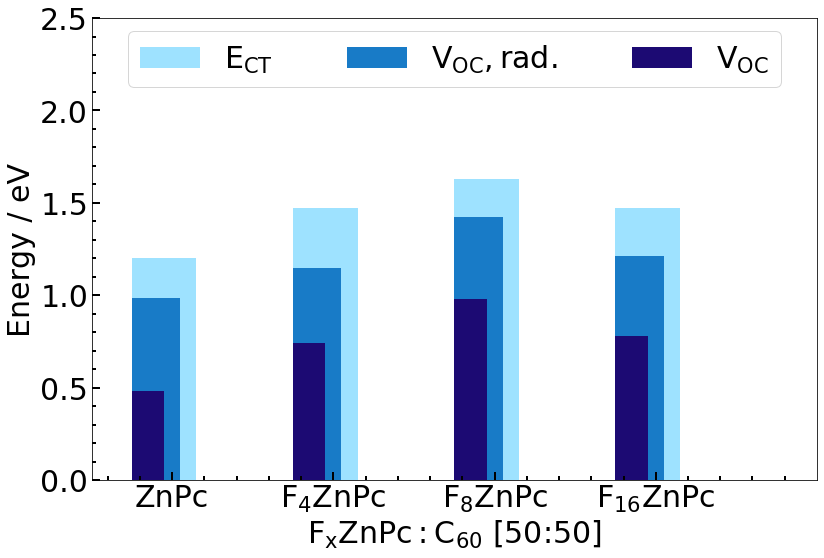

In [29]:
colors = ['#9ee2ff', '#59afe4', '#187bc7', '#0047a2', '#1c0a73']

labels = ['ZnPc', '$\mathregular{F_{4}ZnPc}$', '$\mathregular{F_{8}ZnPc}$', '$\mathregular{F_{16}ZnPc}$']
labels_2 = ['ZnPc', 'F4ZnPc', 'F8ZnPc', 'F16ZnPc']

x = [1,2,3,4]
x_2 = [0.75,1.75,2.75,3.75]

sample_list ={'F0_5':0, 'F0_25':1, 'F0_50':2, 'F0_75':3, 'F4_5':4, 'F4_25':5, 'F4_50':6, 'F4_75':7, 'F8_5':8, 'F8_25':9, 'F8_50':10, 'F8_75':11, 'F8_95':12, 'F16_25':13, 'F16_75':14, 'F16_50':15, 'F16_5':16}

F0 = sample_list['F0_50']
F4 = sample_list['F4_50']
F8 = sample_list['F8_50']
F16 = sample_list['F16_50']

ect = [Ect[F0],Ect[F4],Ect[F8],Ect[F16]]
voc_rad = [voc_rad_list[F0],voc_rad_list[F4],voc_rad_list[F8],voc_rad_list[F16]]
delta_voc_rad = [delta_voc_rad_list[F0],delta_voc_rad_list[F4],delta_voc_rad_list[F8],delta_voc_rad_list[F16]]
delta_voc_non_rad = [delta_voc_nonrad_list[F0],delta_voc_nonrad_list[F4],delta_voc_nonrad_list[F8],delta_voc_nonrad_list[F16]]
voc = [Voc[F0],Voc[F4],Voc[F8],Voc[F16]]

df = pd.DataFrame()
df['Sample'] = labels_2
df['Delta Voc, rad [V]'] = delta_voc_rad
df['Delta Voc, nonrad [V]'] = delta_voc_non_rad

plt.figure(figsize=(13,8.5))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=30, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=30, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{F_{x}ZnPc:C_{60}}$ [50:50]', fontsize=30, fontweight='medium')
#plt.ylabel('Voltage / V', fontsize=30, fontweight='medium')
plt.ylabel('Energy / eV', fontsize=30, fontweight='medium')
plt.xticks(x, labels)

plt.bar(x_2, ect, width=0.4, align='edge', label='$\mathregular{E_{CT}}$', color=colors[0]) #, hatch='/')
plt.bar(x_2, voc_rad, width=0.3, align='edge', label='$\mathregular{V_{OC},rad.}$', color=colors[2])#, hatch='|')
plt.bar(x_2, voc, width=0.2, align='edge', label='$\mathregular{V_{OC}}$', color=colors[4]) #, hatch='\\')

plt.legend(fontsize = 30, bbox_to_anchor=(0.05, 0.85, 0.9, .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)
plt.ylim(0,2.5)
plt.xlim(0.5, 5)



(0.15, 0.4)

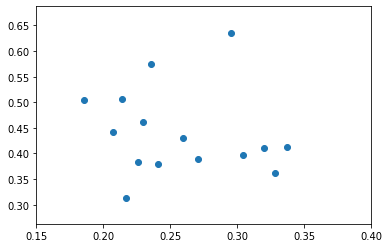

In [69]:
plt.scatter(delta_voc_rad_list, delta_voc_nonrad_list)
plt.xlim(0.15, 0.4)

(1.1, 1.8)

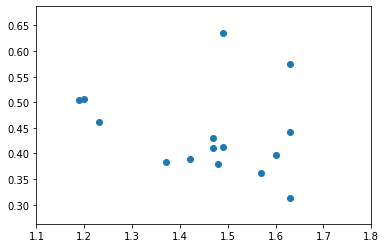

In [83]:
plt.scatter(Ect, delta_voc_nonrad_list)
plt.xlim(1.1, 1.8)

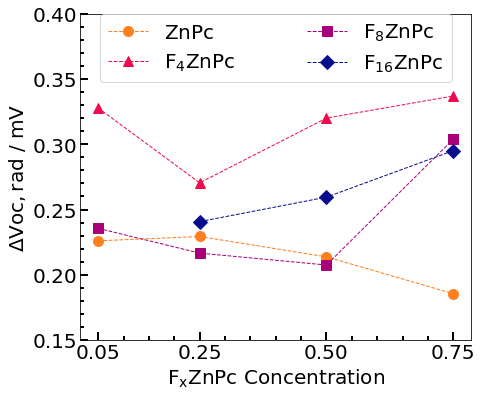

(0.25, 0.8)

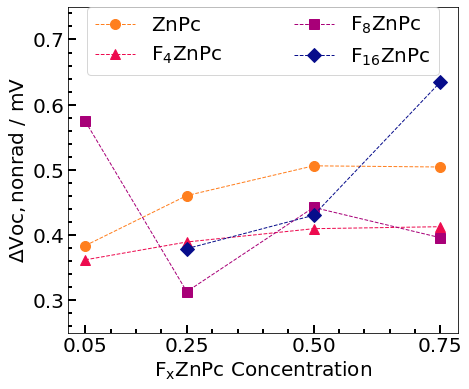

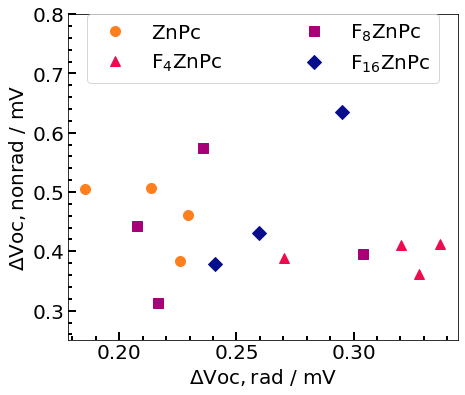

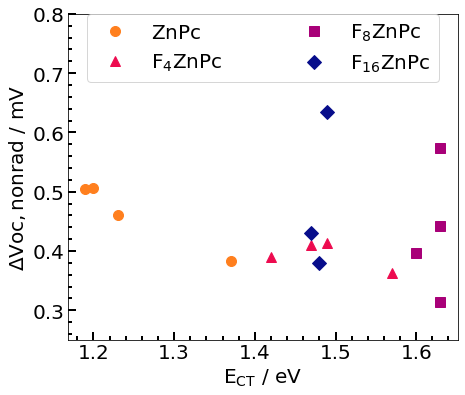

In [86]:
F0_D_vocrad = [delta_voc_rad_list[sample_list['F0_5']],delta_voc_rad_list[sample_list['F0_25']],delta_voc_rad_list[sample_list['F0_50']],delta_voc_rad_list[sample_list['F0_75']]]
F0_D_vocnonrad = [delta_voc_nonrad_list[sample_list['F0_5']],delta_voc_nonrad_list[sample_list['F0_25']],delta_voc_nonrad_list[sample_list['F0_50']],delta_voc_nonrad_list[sample_list['F0_75']]]
F0_Ect = [Ect[sample_list['F0_5']],Ect[sample_list['F0_25']],Ect[sample_list['F0_50']],Ect[sample_list['F0_75']]]

F4_D_vocrad = [delta_voc_rad_list[sample_list['F4_5']],delta_voc_rad_list[sample_list['F4_25']],delta_voc_rad_list[sample_list['F4_50']],delta_voc_rad_list[sample_list['F4_75']]]
F4_D_vocnonrad = [delta_voc_nonrad_list[sample_list['F4_5']],delta_voc_nonrad_list[sample_list['F4_25']],delta_voc_nonrad_list[sample_list['F4_50']],delta_voc_nonrad_list[sample_list['F4_75']]]
F4_Ect = [Ect[sample_list['F4_5']],Ect[sample_list['F4_25']],Ect[sample_list['F4_50']],Ect[sample_list['F4_75']]]

F8_D_vocrad = [delta_voc_rad_list[sample_list['F8_5']],delta_voc_rad_list[sample_list['F8_25']],delta_voc_rad_list[sample_list['F8_50']],delta_voc_rad_list[sample_list['F8_75']]]
F8_D_vocnonrad = [delta_voc_nonrad_list[sample_list['F8_5']],delta_voc_nonrad_list[sample_list['F8_25']],delta_voc_nonrad_list[sample_list['F8_50']],delta_voc_nonrad_list[sample_list['F8_75']]]
F8_Ect = [Ect[sample_list['F8_5']],Ect[sample_list['F8_25']],Ect[sample_list['F8_50']],Ect[sample_list['F8_75']]]

F16_D_vocrad = [delta_voc_rad_list[sample_list['F16_5']],delta_voc_rad_list[sample_list['F16_25']],delta_voc_rad_list[sample_list['F16_50']],delta_voc_rad_list[sample_list['F16_75']]]
F16_D_vocnonrad = [delta_voc_nonrad_list[sample_list['F16_5']],delta_voc_nonrad_list[sample_list['F16_25']],delta_voc_nonrad_list[sample_list['F16_50']],delta_voc_nonrad_list[sample_list['F16_75']]]
F16_Ect = [Ect[sample_list['F16_5']],Ect[sample_list['F16_25']],Ect[sample_list['F16_50']],Ect[sample_list['F16_75']]]


x = [5, 25, 50, 75]

plt.figure(figsize=(7,6))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=20, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=20, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{F_{x}ZnPc}$ Concentration', fontsize=20, fontweight='medium')
plt.ylabel('$\mathregular{\Delta Voc,rad}$ / mV', fontsize=20, fontweight='medium')
plt.xticks(x, labels)

plt.plot(x, F0_D_vocrad, 'o', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{ZnPc}$', color=colors[1])
plt.plot(x, F4_D_vocrad, '^', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{4}ZnPc}$', color=colors[2])
plt.plot(x, F8_D_vocrad,'s', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{8}ZnPc}$', color=colors[3])
plt.plot(x[1:], F16_D_vocrad[1:], 'D', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{16}ZnPc}$', color=colors[4])

plt.legend(fontsize = 20, bbox_to_anchor=(0.05, 0.79, 0.9, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

plt.ylim(0.15, 0.4)
plt.show()

########################

plt.figure(figsize=(7,6))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=20, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=20, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{F_{x}ZnPc}$ Concentration', fontsize=20, fontweight='medium')
plt.ylabel('$\mathregular{\Delta Voc,nonrad}$ / mV', fontsize=20, fontweight='medium')
plt.xticks(x, labels)

plt.plot(x, F0_D_vocnonrad, 'o', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{ZnPc}$', color=colors[1])
plt.plot(x, F4_D_vocnonrad, '^', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{4}ZnPc}$', color=colors[2])
plt.plot(x, F8_D_vocnonrad,'s', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{8}ZnPc}$', color=colors[3])
plt.plot(x[1:], F16_D_vocnonrad[1:], 'D', markersize = 10, linestyle='--', linewidth=1, label='$\mathregular{F_{16}ZnPc}$', color=colors[4])

plt.legend(fontsize = 20, bbox_to_anchor=(0.05, 0.79, 0.9, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

plt.ylim(0.25, 0.75)

########################

plt.figure(figsize=(7,6))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=20, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=20, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{\Delta Voc,rad}$ / mV', fontsize=20, fontweight='medium')
plt.ylabel('$\mathregular{\Delta Voc,nonrad}$ / mV', fontsize=20, fontweight='medium')
#plt.xticks(x, labels)

plt.plot(F0_D_vocrad, F0_D_vocnonrad, 'o', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{ZnPc}$', color=colors[1])
plt.plot(F4_D_vocrad, F4_D_vocnonrad, '^', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{4}ZnPc}$', color=colors[2])
plt.plot(F8_D_vocrad, F8_D_vocnonrad,'s', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{8}ZnPc}$', color=colors[3])
plt.plot(F16_D_vocrad[1:], F16_D_vocnonrad[1:], 'D', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{16}ZnPc}$', color=colors[4])

plt.legend(fontsize = 20, bbox_to_anchor=(0.05, 0.79, 0.9, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

plt.ylim(0.25, 0.8)


########################

plt.figure(figsize=(7,6))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=20, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=20, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{E_{CT}}$ / eV', fontsize=20, fontweight='medium')
plt.ylabel('$\mathregular{\Delta Voc,nonrad}$ / mV', fontsize=20, fontweight='medium')
#plt.xticks(x, labels)

plt.plot(F0_Ect, F0_D_vocnonrad, 'o', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{ZnPc}$', color=colors[1])
plt.plot(F4_Ect, F4_D_vocnonrad, '^', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{4}ZnPc}$', color=colors[2])
plt.plot(F8_Ect, F8_D_vocnonrad,'s', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{8}ZnPc}$', color=colors[3])
plt.plot(F16_Ect[1:], F16_D_vocnonrad[1:], 'D', markersize = 10, linestyle='--', linewidth=0, label='$\mathregular{F_{16}ZnPc}$', color=colors[4])

plt.legend(fontsize = 20, bbox_to_anchor=(0.05, 0.79, 0.9, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

plt.ylim(0.25, 0.8)



## CT State Energy

(0, 0.8)

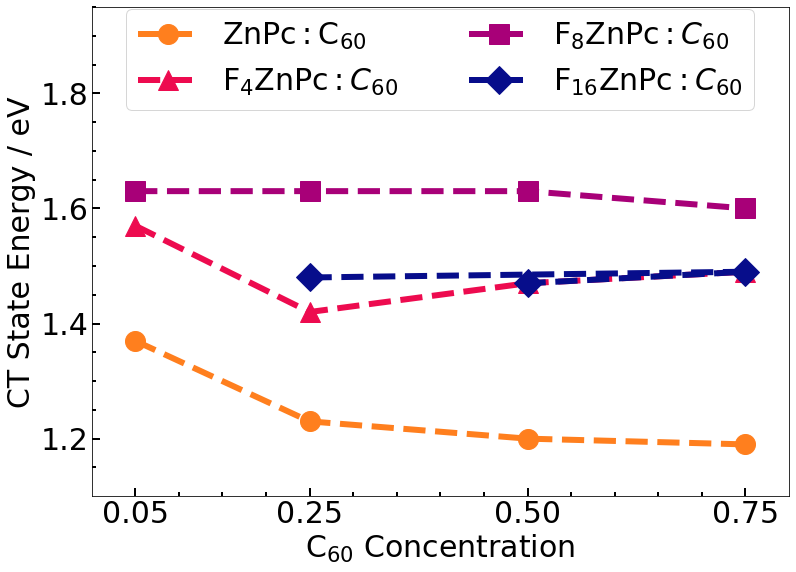

In [30]:
labels = ['0.05', '0.25', '0.50', '0.75']
x = [0.05, 0.25, 0.50, 0.75]
x_2 = [0.25, 0.75, 0.5]
colors = ['#f0d314', '#ff7f1e', '#ed0b4f', '#a80078', '#070d8b']


plt.figure(figsize=(12.5,9))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=30, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=30, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{C_{60}}$ Concentration', fontsize=30, fontweight='medium')
plt.ylabel('CT State Energy / eV', fontsize=30, fontweight='medium')
plt.xticks(x, labels)

plt.plot(x, Ect[0:4],'o', markersize = 20, linestyle='--', linewidth=6, label='$\mathregular{ZnPc:C_{60}}$', color=colors[1])
plt.plot(x, Ect[4:8], '^', markersize = 20, linestyle='--', linewidth=6, label='$\mathregular{F_{4}ZnPc}:C_{60}$', color=colors[2])
plt.plot(x, Ect[8:12], 's', markersize = 20, linestyle='--', linewidth=6, label='$\mathregular{F_{8}ZnPc}:C_{60}$', color=colors[3])
plt.plot(x_2, Ect[13:16], 'D', markersize = 20, linestyle='--', linewidth=6, label='$\mathregular{F_{16}ZnPc}:C_{60}$', color=colors[4])

plt.legend(fontsize = 30, bbox_to_anchor=(0.05, 0.79, 0.9, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.ylim(1.1,1.95)
plt.xlim(0, 0.8)

## Open Circuit Voltage

(-0.05, 1)

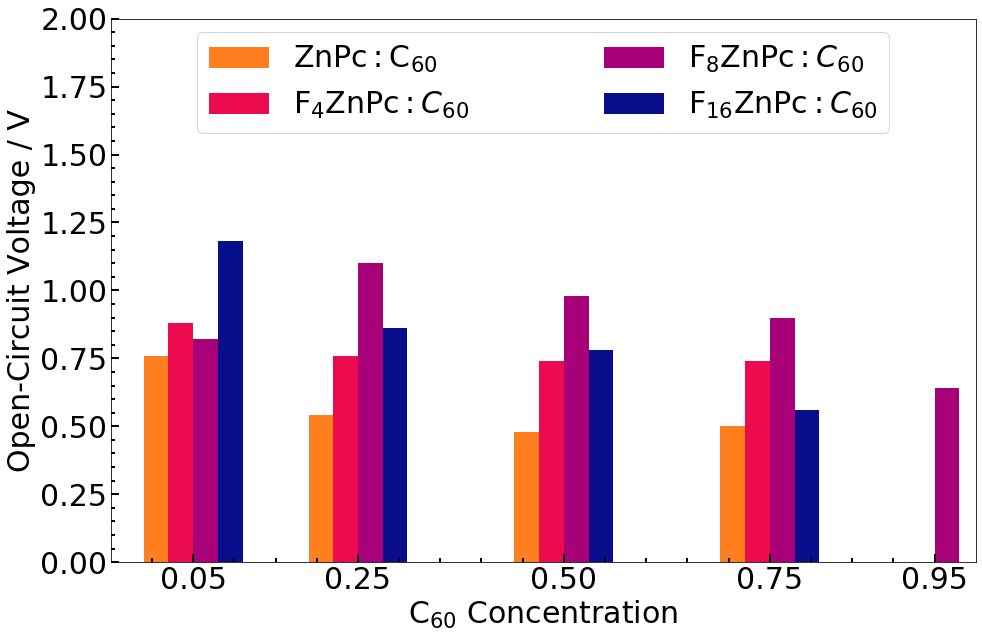

In [19]:
labels = ['0.05', '0.25', '0.50', '0.75', '0.95']
x = [0.05, 0.25, 0.5, 0.75, 0.95]
x_2 = [0.25, 0.75, 0.5, 0.05, 0.95]

width = 0.03
x_2m = [n - 2*width for n in x]
x_m = [n - width for n in x]
x_p = [n + width for n in x_2]
colors = ['#f0d314', '#ff7f1e', '#ed0b4f', '#a80078', '#070d8b']


plt.figure(figsize=(15.5,10))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=30, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=30, direction='in', axis='both', which='minor', length=4, width=2)
plt.xlabel('$\mathregular{C_{60}}$ Concentration', fontsize=30, fontweight='medium')
plt.ylabel('Open-Circuit Voltage / V', fontsize=30, fontweight='medium')
plt.xticks(x, labels)

plt.bar(x_2m[0:4], Voc[0:4], width=width, align='edge', label='$\mathregular{ZnPc:C_{60}}$', color=colors[1]) #, hatch='/')
plt.bar(x_m[0:4], Voc[4:8], width=width, align='edge', label='$\mathregular{F_{4}ZnPc}:C_{60}$', color=colors[2]) #, hatch='|')
plt.bar(x, Voc[8:13], width=width, align='edge', label='$\mathregular{F_{8}ZnPc}:C_{60}$', color=colors[3]) #, hatch='\\')
plt.bar(x_p[0:4], Voc[13:17], width=width, align='edge', label='$\mathregular{F_{16}ZnPc}:C_{60}$', color=colors[4]) #, hatch='-')

plt.legend(fontsize = 30, bbox_to_anchor=(0.1, 0.79, 0.8, .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.ylim(0,2)
plt.xlim(-0.05, 1)

<BarContainer object of 5 artists>

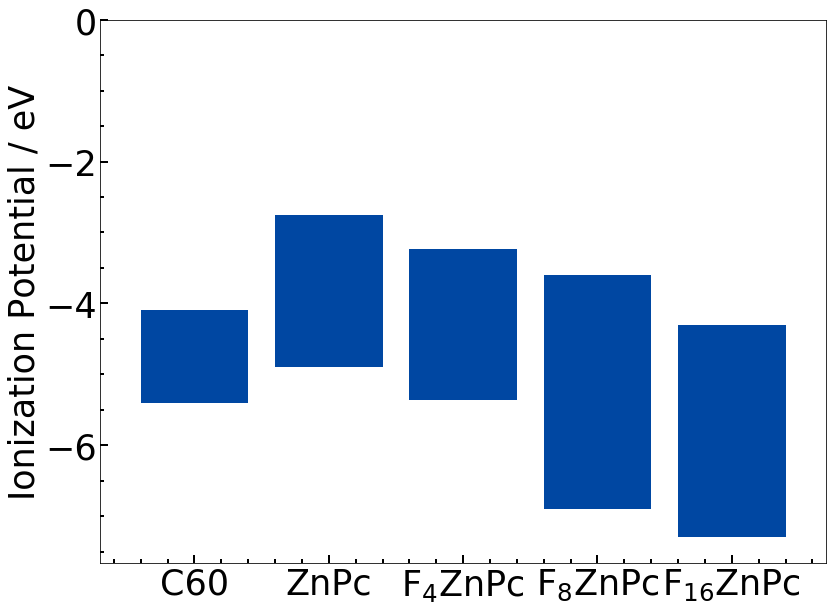

In [18]:
labels = ['C60', 'ZnPc', '$\mathregular{F_{4}ZnPc}$', '$\mathregular{F_{8}ZnPc}$', '$\mathregular{F_{16}ZnPc}$']
x = [1,2,3,4,5]
x_2 = [0.75,1.75,2.75,3.75]
colors = ['#9ee2ff', '#59afe4', '#187bc7', '#0047a2', '#1c0a73']

width = 0.3

#HOMO = [-5.4, -5.5, -6.2, -6.9, -7.3] # These are rough estimates from the Schwarze papers
#LUMO = [-4.1, -2.8, -3.2, -3.6, -4.3]

HOMO = [-5.4, -4.9, -5.36, -6.9, -7.3] # These are rough estimates from the Schwarze papers
LUMO = [-4.1, -2.75, -3.23, -3.6, -4.3]

plt.figure(figsize=(13,10))
plt.grid(False)
plt.tick_params(labelsize=14)
plt.minorticks_on()
plt.rcParams['figure.facecolor']='xkcd:white'
plt.rcParams['figure.edgecolor']='xkcd:white'
plt.tick_params(labelsize=35, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=35, direction='in', axis='both', which='minor', length=4, width=2)
plt.ylabel('Ionization Potential / eV', fontsize=35, fontweight='medium')
plt.xticks(x, labels)
#plt.ylim(-7.9, -5.1)
plt.xlim(0.3, 5.7)

plt.bar(x, HOMO, color='#0047a2')
plt.bar(x, LUMO, color='white')

## EL Test

In [ ]:
el = pd.read_table('ZnPc_Data/ZnPc_series_EL_analysis/5_F8.txt', sep=',', index_col=0)

In [ ]:
plt.plot(el['Wavelength'][550:800], el['Signal'][550:800])

In [ ]:
energy = []

for x in el['Wavelength']:
    energy_val = (h * c * math.pow(10, 9)) / (x * q)
    energy.append(energy_val)
    
el['Energy'] = energy

In [ ]:
bb_s = bb(energy)

In [ ]:
red_EL = []

for x in range(len(el['Energy'])):
    red_el = el['Signal'][x]/el['Energy'][x]
    red_EL.append(red_el)

In [ ]:
red_EQE = []

for x in range(len(F8ZnPc_5['Energy'])):
    red_eqe = F8ZnPc_5['Energy'][x] * F8ZnPc_5['EQE'][x]
    red_EQE.append(red_eqe)

In [ ]:
scaled = []

for y in range(len(el['Energy'])):
    s = (red_EL[y]) / bb_s['Phi'][y] 
    scaled.append(s)

In [ ]:
sf = 200000

In [ ]:
EL_el = [x / sf for x in red_EL[550:800]]
EL_abs = [x / sf for x in scaled[550:800]]

In [ ]:
plt.semilogy(el['Energy'][550:800], EL_abs)
plt.semilogy(el['Energy'][550:800], EL_el)
plt.semilogy(F8ZnPc_5['Energy'], red_EQE)